In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import matplotlib#.pyplot as plt
import datetime
from flask import Flask, session
from flask_sqlalchemy import SQLAlchemy
from flask_cors import CORS 



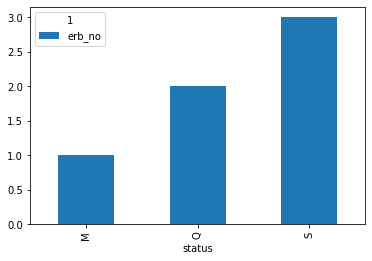

In [67]:
control_sheet = pd.read_excel(r"C:\Users\LogisticsUser02\Desktop\control_sheet.xlsx",usecols=[2,3,4,6,8,9,10,11,13,16,17],na_values='á');
control_sheet.columns = control_sheet.iloc[1].str.replace('\n',' ',regex=False)
control_sheet.dropna(inplace=True,how='all')
control_sheet.drop(index=1,inplace=True)
control_sheet[['PART NAME','REOCCURENCE']]
control_sheet[['PART NO','QTY']] = control_sheet['PART NO. (Q\'TY)'].str.split('\n', expand=True)[[0,1]]
control_sheet.drop(columns='PART NO. (Q\'TY)', inplace=True)
control_sheet[['PART NO', 'QTY']]
control_sheet.columns = (control_sheet.columns
            .str.replace(' ','_', regex=False)
            .str.replace('BACKUP(B)/_SHORT(S)/_MISSING(M)/_WRONG(W)/_QUALITY(Q)','status',regex=False)
            .str.replace('ER/SMQR','erb',regex=False)
            .str.replace('CPO/SPO_/RWO','order_no',regex=False)
            .str.replace('COPED/ER(C)?_YES(Y)/_NO(N)','coped',regex=False)
            .str.replace('(','',regex=False)
            .str.replace(')','', regex=False)
            .str.lower()
            )
control_sheet.fillna(method='ffill', inplace=True)
control_sheet['qty'] = control_sheet['qty'].str.replace(r"\(*\)","",regex=True)
control_sheet['qty'] = control_sheet['qty'].str.replace(r"(","",regex=True)
control_sheet.drop(columns=np.nan, inplace=True)
control_sheet[control_sheet['status']=='Q']['erb_no'].count()
# control_sheet.plot(kind='bar', x='erb_no', y='qty')
# control_sheet.groupby('status')[['erb_no']].count().plot(kind='bar')
control_sheet[(control_sheet['problem_date']>='2022-06-02') &(control_sheet['problem_date']<='2022-06-08')].groupby('status')[['erb_no']].count().plot(kind='bar')
# control_sheet.columns
plt.show()
# control_sheet

In [82]:
datetime.datetime.now().strftime('%Y-%m-%d')
datetime.datetime(22,6,8).strftime('%Y-%m-%d')


'0022-06-08'